## Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Save file locally

In [3]:
df.to_csv('module_5_auto.csv')

Lets extract just the numeric variables

In [4]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


#### Libraries for ploting

In [5]:
# conda install -c conda-forge ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

#### Create function with plotting characteristics

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 15
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist = False, color = 'r', label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color ='b', label = BlueName, ax = ax1)

    plt.title(Title)
    plt.xlabel('Price in dollars')
    plt.ylabel('Proportion of cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 15
    height = 6
    plt.figure(figsize=(width, height))

    # training data
    # testing data
    # lr: linear regression object
    # poly_transform : polynimial transformation object

    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label = 'Predicted Function')
    plt.ylim(-10000, 60000)
    plt.ylabel('Prce')
    plt.legend()

#### Split the data into train and test

Place the target data into a specific data frame called y_data

In [8]:
y_data = df['price']

Drop price data in dtaframe x_data

In [9]:
x_data = df.drop('price', axis = 1)

Randomly split the data frame into training and testing data using the function train_test_split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

# here we fing the proportion of data that is split into testing and training set.
print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  21
number of training samples:  180


## Practice

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("number of test samples: ", x_test1.shape[0])
print("number of training samples: ", x_train1.shape[0])

number of test samples:  81
number of training samples:  120


#### Import the LinearRegression function from module linear_model

In [12]:
from sklearn.linear_model import LinearRegression

#### Create linear Regression object

In [13]:
lre = LinearRegression()

We fit the model using the feature horsepower

In [14]:
model_1 = lre.fit(x_train[['horsepower']], y_train)

Calculate R^2 on test data

In [15]:
R_score_test_1 = lre.score(x_test[['horsepower']], y_test)
R_score_test_1

0.3635875575078824

In [16]:
R_score_train_1 = lre.score(x_train[['horsepower']], y_train)
R_score_train_1

0.6619724197515103

We can see that the R^" of test data is smaller than R^2 train data

#### Find the values of R^2 of tran and test data for the 40% split data

In [17]:
model_2 = lre.fit(x_train1[['horsepower']], y_train1)

In [18]:
R_score_test_11 = lre.score(x_test1[['horsepower']], y_test1)
R_score_test_11

0.7139364665406973

In [19]:
R_score_train_11 = lre.score(x_train1[['horsepower']], y_train1)
R_score_train_11

0.5754067463583004

### Cross Validation Score

Import model_selection from the module cross_val_score

In [20]:
from sklearn.model_selection import cross_val_score

Input the object, feature ("horsepower), the arget data(y_data). The parameter cv determines the number of folds in this case 4.

In [21]:
Rcross_1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv =4)

The default scoring of R^2. Each element in the array has the average R^2 value fot the fold

In [22]:
Rcross_1

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Calculate the average and standard deviation of our estimate

In [23]:
print("The mean of the folds is: ", Rcross_1.mean(), "and the standard deviation is :", Rcross_1.std())

The mean of the folds is:  0.522009915042119 and the standard deviation is : 0.2911839444756029


Use negative squared error as a score by setting the parameter scorring metric to "neg_mean_squared_error

In [24]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

#### Practice : Calculate the average R^2 using two folds and find the average R^2 for the secong fold utilising the horsepower feature

In [25]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rc

array([0.59015621, 0.44319613])

In [26]:
print('The mean of folds is:', Rc.mean(), 'and the standard deviation is:', Rc.std())

The mean of folds is: 0.5166761697127429 and the standard deviation is: 0.07348004195771385


We can predict the output using the function cross_val_predict

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:10]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284])

## Underfitting, Overfitting and Model Selection

The test data or the out of sample data is the best measure how well your model performsin the real world. One reason is the overfitting.  
The differences appear more often in multilinear regression and polynomial regression so we are going to test this in this context.  

Create multilinear object first.

In [29]:
lr = LinearRegression()

In [30]:
model = lr.fit(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']], y_train)

Prediction using training data:

In [31]:
yhat_train = lr.predict(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Predict using test data:

In [32]:
yhat_test = lr.predict(x_test[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

#### Perform Model Evaluation

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Examine the distribution of the predicted values of the training data

Declare the variables:

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


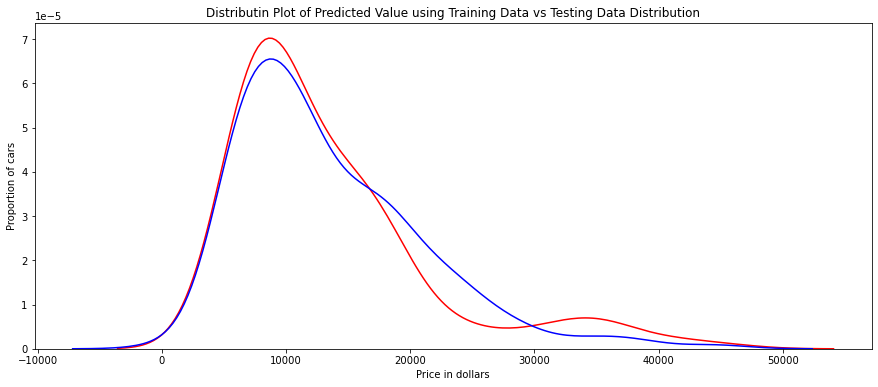

In [34]:
Title = 'Distributin Plot of Predicted Value using Training Data vs Testing Data Distribution'
DistributionPlot(y_train, yhat_train, 'Actual values (Train)', 'Predicted values (Test)', Title)

The model seems to be doing well in learning from the training dataset.  
Let's see what hapens when the model encounters new data from the testing dataset.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


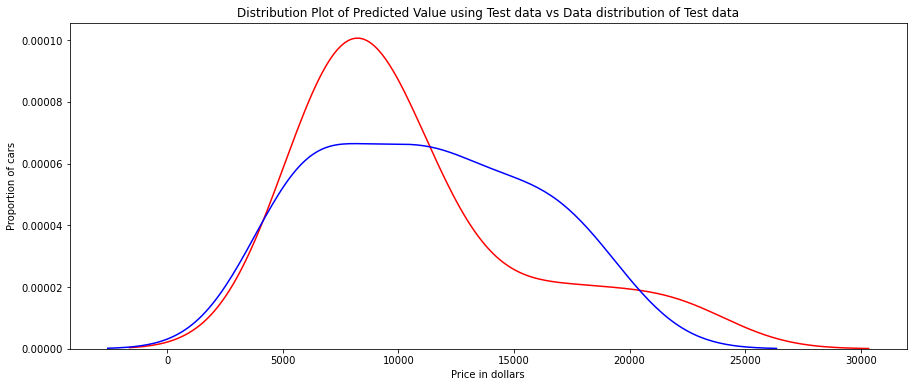

In [35]:
Title = 'Distribution Plot of Predicted Value using Test data vs Data distribution of Test data'
DistributionPlot(y_test, yhat_test, 'Actual values (test)', 'Predicted values (test)', Title)

The distribution of test data is much better at fitting the data.  
This is evident in fig 2. in the range 5000 to 15000.  
Lts's see if polynomial regression also exibits a drop in the prediction accuracy when analysisng the data set.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

Overfitting occurs when the model fits the noise but not the underlying proces.  
When testing using test set your model does not perform well since is modelling the noise not the underlying process that generated the relationship.  
Create a 5 polynomial model.  
using just 55% of the data for training and the rest for testing.

In [37]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size =0.45, random_state = 0)

Perform a 5 degree polynomial transformation on the feature horsepower.

In [38]:
pr = PolynomialFeatures()
x_train_pr = pr.fit_transform(x_train2[['horsepower']])
x_test_pr = pr.fit_transform(x_test2[['horsepower']])
pr

PolynomialFeatures()

Create linear Regression Model poly and train it.

In [39]:
model_poly = LinearRegression().fit(x_train_pr,y_train2)

See the output of our model using the method predict.

In [40]:
yhat_poly = model_poly.predict(x_test_pr)
yhat_poly[0:10]

array([ 7688.07835287,  8113.70326276, 11304.0370992 , 20135.51565886,
       20785.91693536,  9838.81237416, 13548.97725304,  6564.1321127 ,
       15231.19063773,  7688.07835287])

Lets compare the first values of predicted with the actual values.  

In [41]:
print('Predicted values', yhat_poly[0:10])
print('True values', yhat_test[0:10])

Predicted values [ 7688.07835287  8113.70326276 11304.0370992  20135.51565886
 20785.91693536  9838.81237416 13548.97725304  6564.1321127
 15231.19063773  7688.07835287]
True values [11349.35089149  5884.11059106 11208.6928275   6641.07786278
 15565.79920282  6028.29617155 18958.50000053 11089.07032063
 15601.88220834  5721.82879083]


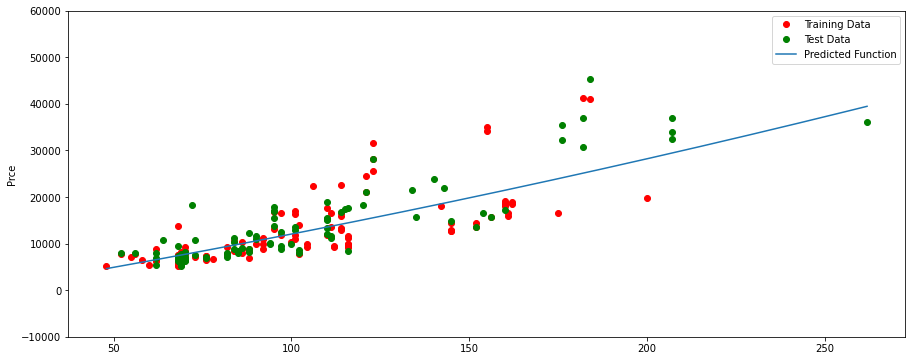

In [42]:
PollyPlot(x_train2[['horsepower']], x_test2[['horsepower']], y_train2, y_test2, model_poly, pr)

Red dots represent training data and green dots test data and the blue line is the model prediction.  
Around the value 200 the function begins to diverge from the data points.  

#### R^2 of the training data

In [43]:
R2_poly = model_poly.score(x_test_pr, y_test2)
R2_poly

0.7405858710699834

Let's see how R^2 changes for different order polynomials and then plot the results.  

Text(3, 0.75, 'Maximum R^2')

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

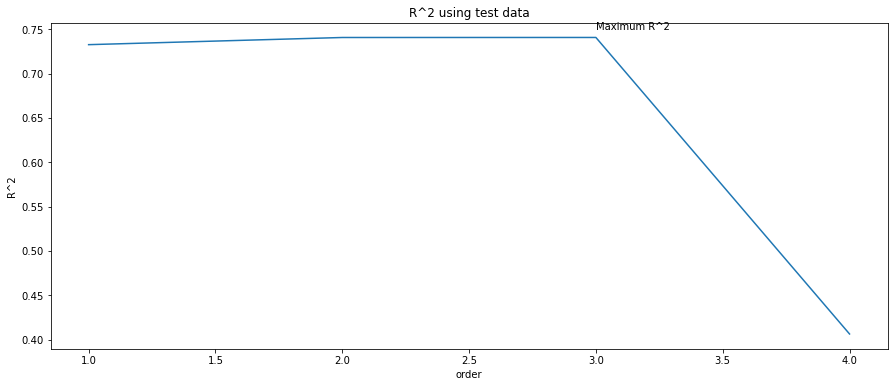

In [44]:
Rsqu_test = []

order = [1,2,3,4]
for n in order:
    width = 15
    height = 6
    plt.figure(figsize=(width, height))
    
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train2[['horsepower']])
    x_test_pr = pr.fit_transform(x_test2[['horsepower']])

    model_degrees = lr.fit(x_train_pr, y_train2)
    Rsqu_test.append(model_degrees.score(x_test_pr, y_test2))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3, 0.75, 'Maximum R^2')

We see R increases until an order 3 polynomial is used then the R^2 dramatically decreases at an order 4 polynomial.

Create a function to do the whole polynomial regression process:

In [45]:
def f(order, test_data):
    x_train3, x_test3, y_train3, y_test3 = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)

    pr = PolynomialFeatures(degree=order)

    x_train_pr3 = pr.fit_transform(x_train3[['horsepower']])
    x_test_pr3 = pr.fit_transform(x_test3[['horsepower']])

    model_3 = LinearRegression().fit(x_train_pr3, y_train3)

    PollyPlot(x_train3[['horsepower']], x_test3[['horsepower']], y_train3, y_test3, model_3, pr)

The following interface allows to experiment with different polynomial orders and different ammounts of data

In [46]:
interact(f, order = (0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

#### Practice: Create a polynomial feature of order 2

In [47]:
pr_practic = PolynomialFeatures(degree=2)

In [48]:
x_train_practic = pr_practic.fit_transform(x_train[['horsepower', 'curb-weight','engine-size','highway-mpg']])
x_test_practic = pr_practic.fit_transform(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']])

How many dimensions does the new feature have?

In [49]:
x_train_practic.shape

(180, 15)

Create a linear model. train the object using the method fit: using a polynomial feature

In [50]:
model_practic = LinearRegression().fit(x_train_practic, y_train)

Use the method predict to output a polynomial features then use the function DistributionPlot to display the distribution of the predicted test output vs the actual test data.

In [51]:
yhat_practic = model_practic.predict(x_test_practic)

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


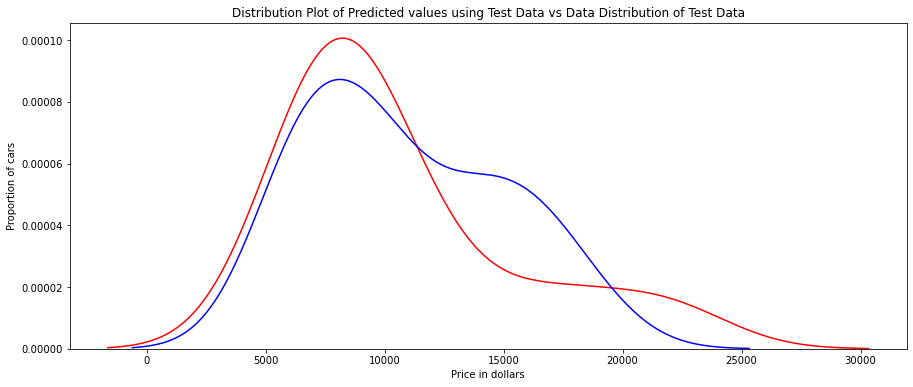

In [52]:
Title = 'Distribution Plot of Predicted values using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_practic, 'Actual Values (Test)', 'Predicted Values (Test)', Title)
# y_test = red; yhat_practic = blue - predicted values.

 10000 to 20000 the predicted values are much higher than true values  
 30000 to 40000 the true values are higher that predicted values

## Ridge Regression

Test data will be used as validation data.

In [53]:
pr_ridge = PolynomialFeatures()
x_train_ridge = pr_ridge.fit_transform(x_train[['horsepower', 'curb-weight','engine-size','highway-mpg']])
x_test_ridge = pr_ridge.fit_transform(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']])

#### Import Ridge function from linear models

In [54]:
from sklearn.linear_model import Ridge

#### Create the model

In [58]:
RidgeModel = Ridge(alpha=1)

#### Fit the model using the method fit

In [59]:
model_ridge = RidgeModel.fit(x_train_ridge, y_train)

#### Model Prediction

In [60]:
yhat_ridge = model_ridge.predict(x_test_ridge)

#### Compare and visualise values of predicted versus true values

In [65]:
print('predicted', yhat_ridge[0:4])
print('test set', y_test[0:4].values)

predicted [10043.61571188  6035.02226763 10375.69204564  6791.37365687]
test set [ 9549.  6229. 10245.  7295.]


We select a values of alpha that minimises the test error. To do so we can use a for loop. We will create a progress bar to see how many iterations we have completed so far.

In [67]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    
    RidgeModel = Ridge(alpha = alpha).fit(x_train_ridge, y_train)
    
    test_score, train_score = RidgeModel.score(x_test_ridge, y_test), RidgeModel.score(x_train_ridge, y_train)

    pbar.set_postfix({'Test Score':test_score, 'Train Score': train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|██████████| 1000/1000 [00:06<00:00, 147.18it/s, Test Score=0.719, Train Score=0.847]


#### Plot te values of R^2 for different alphas

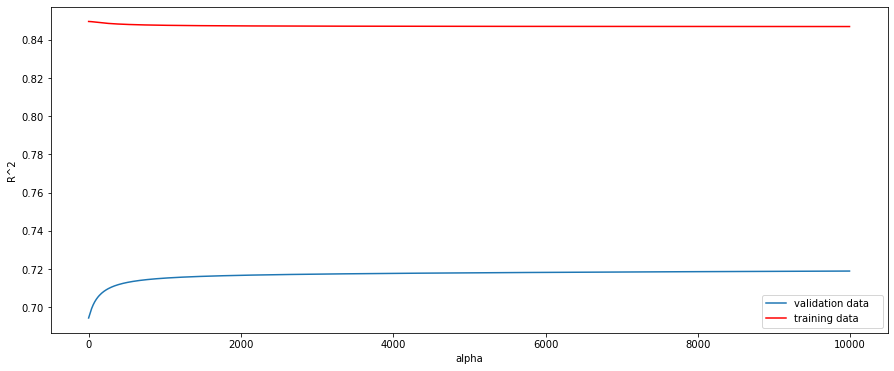

In [68]:
plt.figure(figsize = (15,6))

plt.plot(Alpha, Rsqu_test, label = 'validation data   ')
plt.plot(Alpha, Rsqu_train, 'r', label = 'training data  ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line represents the R^2 of the training data , as alpha increases the r^2 decreases. Therefore as alpha increses the model perform worse on the training data.
The blue line represents R^2 on the validation - test data, as the value of alpha increases the R^2 increases and converges at a point.

## Practice Ridge Regression

Perform Ridge Regression. Calculate R^2 using the polynomial feature , use the training data to train the model and use the test data to test the model. The parameter alpha shoul be 10

In [69]:
RidgeModel1 = Ridge(alpha = 10).fit(x_train_ridge, y_train)

In [71]:
R_ridge = RidgeModel1.score(x_test_ridge, y_test)
R_ridge

0.695677965069075

## Grid Search

the tem alpha is a hyperparameter or adjusting parameter tunning parameter. Sklear has the class GridSearchCV to make the process simpler and to find the best hyperparameter simpler.

#### Import GridSearchCV from the module model_selection

In [72]:
from sklearn.model_selection import GridSearchCV

Create a parameter dictionary with values:

In [75]:
parameters1 = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

Create ridge regression object:

In [77]:
RR = Ridge()
RR

Ridge()

Create ridge grid search object:

In [81]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Fit the model:

In [82]:
model_grid = Grid1.fit(x_data[['horsepower', 'curb-weight','engine-size','highway-mpg']], y_data)

The object finds the best parameter values on the validation data.  
We can obtain the estimator with the best parameters and assign it to the variable BestRR:

In [83]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Test our model on the test data

In [85]:
BestRR.score(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']], y_test)

0.6373308904159389

#### Practice Grid Search for best alpha

In [92]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], 'normalize':[True, False]} ]
parameters2

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
  'normalize': [True, False]}]

In [93]:
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)

In [94]:
model_grid_2 = Grid2.fit(x_data[['horsepower', 'curb-weight','engine-size','highway-mpg']], y_data)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

In [96]:
estimator = model_grid_2.best_estimator_
estimator

Ridge(alpha=0.1, normalize=True)

In [97]:
estimator.score(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']], y_test)

0.6240079089042073